<a href="https://colab.research.google.com/github/merttezcan/ML-Homeworks/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('sinav2-100-yuvarlak.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def minkowski_distance(a, b, p=2):

    #When p=1, the distance is known as the Manhattan distance.
    #When p=2, the distance is known as the Euclidean distance.
    
    dim = len(a)
    distance = 0

    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [ ]:
# just for testing

test_pt = [55,65]


distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,0.000000
32,3.605551
33,5.000000
89,5.000000
83,5.385165


In [ ]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter

    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]

        y_hat_test.append(prediction)
        
    return y_hat_test

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3, p=1)

print(y_hat_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))


0.92


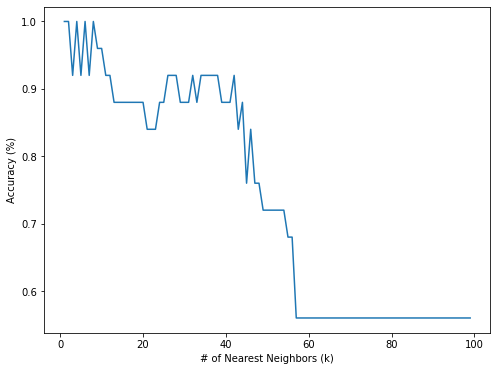

In [ ]:
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');
